In [1]:
import os
from keras.models import load_model
import numpy as np
import pickle
import cv2
from keras.preprocessing.image import img_to_array


Using TensorFlow backend.


In [2]:
model = load_model('aedes')
lb = pickle.loads(open("lb.pickle", "rb").read())

In [3]:
os.chdir(r'./examples')
labels = os.listdir(".")
print(labels)

['NEUTROPHIL', 'EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE']


In [4]:
index = 0
changedLabel = labels
var = labels[0]
changedLabel.pop(0)
changedLabel.append(var)
print(changedLabel)

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


In [5]:
matrix = np.zeros((len(labels), len(labels)))
for n in changedLabel:
    for x in os.listdir("./"+ n):
        print(x)
        image = cv2.imread(n+'/'+x)
        output = image.copy()

        # pre-process the image for classification
        image = cv2.resize(image, (96, 96))
        image = image.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        proba = model.predict(image)[0]
        print(proba)
        idx = np.argmax(proba)
        print("É: " + str(index))
        print("Acusa: " + str(idx))
        label = lb.classes_[idx]
        print("É: " + str(changedLabel[index]))
        print("Acusa: " + str(label))
        print('\n')
        matrix[index][idx] += 1
    index += 1

_6_7701.jpeg
[7.9760030e-05 1.8691841e-07 3.9833845e-11 9.9992001e-01]
É: 0
Acusa: 3
É: EOSINOPHIL
Acusa: NEUTROPHIL


_9_2814.jpeg
[8.4223580e-01 2.9918424e-06 3.7152260e-11 1.5776123e-01]
É: 0
Acusa: 0
É: EOSINOPHIL
Acusa: EOSINOPHIL


_12_2599.jpeg
[5.4558891e-10 1.8168226e-04 1.0385967e-14 9.9981838e-01]
É: 0
Acusa: 3
É: EOSINOPHIL
Acusa: NEUTROPHIL


_4_8814.jpeg
[1.01766832e-36 8.13419021e-09 1.22727795e-17 1.00000000e+00]
É: 0
Acusa: 3
É: EOSINOPHIL
Acusa: NEUTROPHIL


_0_5239.jpeg
[1.01766832e-36 8.13419021e-09 1.22727795e-17 1.00000000e+00]
É: 0
Acusa: 3
É: EOSINOPHIL
Acusa: NEUTROPHIL


_3_625.jpeg
[9.9920648e-01 7.8898418e-04 1.2674760e-08 4.4998155e-06]
É: 0
Acusa: 0
É: EOSINOPHIL
Acusa: EOSINOPHIL


_5_1744.jpeg
[4.0025335e-02 6.0252354e-02 3.6406738e-09 8.9972234e-01]
É: 0
Acusa: 3
É: EOSINOPHIL
Acusa: NEUTROPHIL


_10_5476.jpeg
[2.0315693e-22 5.8851037e-07 5.9280077e-17 9.9999940e-01]
É: 0
Acusa: 3
É: EOSINOPHIL
Acusa: NEUTROPHIL


_7_2284.jpeg
[9.9907434e-01 8.9757715e-

No eixo X temos o que o objeto é e no eixo Y temos a predição dele

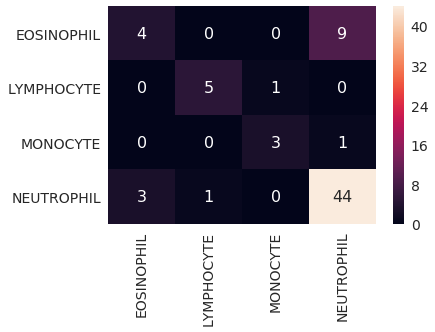

In [7]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
   
df_cm = pd.DataFrame(matrix, changedLabel,
                  changedLabel)
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [7]:
print(matrix)

[[ 4.  0.  0.  9.]
 [ 0.  5.  1.  0.]
 [ 0.  0.  3.  1.]
 [ 3.  1.  0. 44.]]


In [8]:
percmatrix = matrix
index2=0
for n in percmatrix:
    lendirectory = len(os.listdir("./"+changedLabel[index2]))
    line=0
    for m in n:
        percmatrix[index2][line] = (float(m)/float(lendirectory))
        line+=1
    index2 += 1

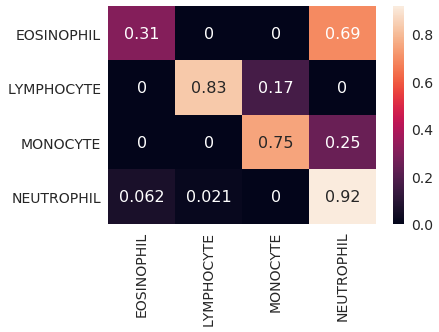

In [9]:
dp_cm = pd.DataFrame(percmatrix, changedLabel,
                  changedLabel)
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(dp_cm, annot=True,annot_kws={"size": 16})# font size